# ARMA Model

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import time


## Loading and Pre-processing data

In [2]:
# Load dataset
file_path = 'data/germany_cleaned_load_data.csv'
data = pd.read_csv(file_path)

# Convert timestamps and set index
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])
data.set_index('utc_timestamp', inplace=True)

# Select target variable
target_variable = data['DE_load_actual_entsoe_transparency']

# Train-Test Split
train_size = int(len(target_variable) * 0.8)
train, test = target_variable[:train_size], target_variable[train_size:]

## ADF Test

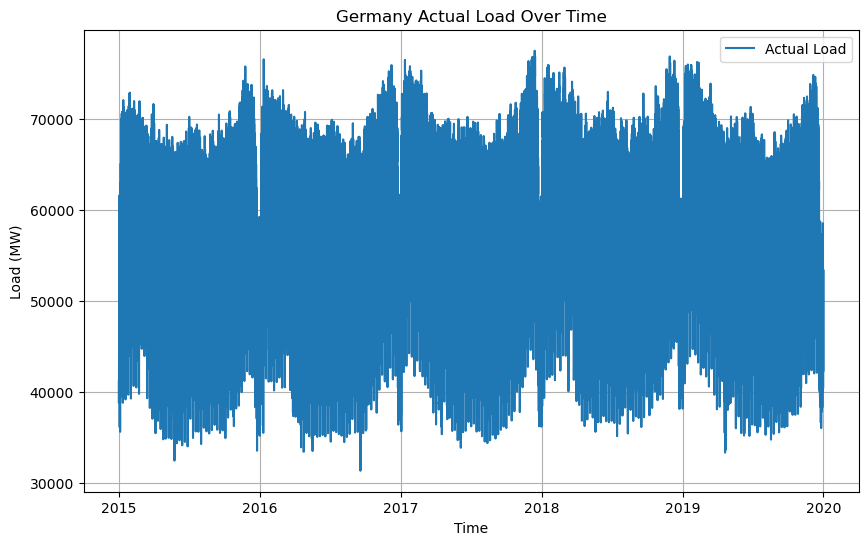

ADF Statistic: -22.83631356733673
p-value: 0.0
Critical Values:
   1%: -3.4304994170070295
   5%: -2.861606039041269
   10%: -2.5668051504336344

The data is stationary (p-value < 0.05).


In [3]:
# Plot actual load
plt.figure(figsize=(10, 6))
plt.plot(target_variable, label='Actual Load')
plt.title("Germany Actual Load Over Time")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.grid(True)
plt.show()

# ADF Test
adf_result = adfuller(target_variable.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

if adf_result[1] < 0.05:
    print("\nThe data is stationary (p-value < 0.05).")
else:
    print("\nThe data is not stationary (p-value >= 0.05). Consider differencing.")

## ACF and PACF plots

<Figure size 1000x600 with 0 Axes>

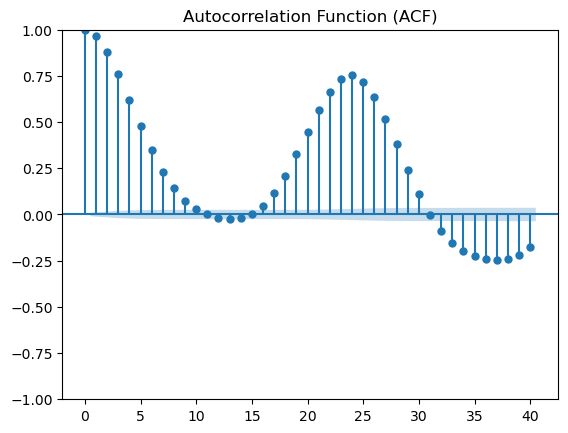

<Figure size 1000x600 with 0 Axes>

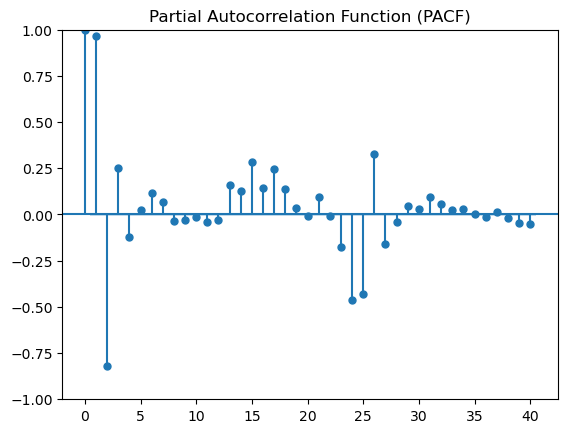

In [4]:
# ACF Plot
plt.figure(figsize=(10, 6))
plot_acf(target_variable, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# PACF Plot
plt.figure(figsize=(10, 6))
plot_pacf(target_variable, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## ARMA Model with p,q=2

Training ARMA(2,2) model...


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Generating Forecasts...

ARMA(2,2) Evaluation Metrics:
MAPE: 0.1612
MAE: 8614.2914
RMSE: 9889.2307
R² Score: 0.0005


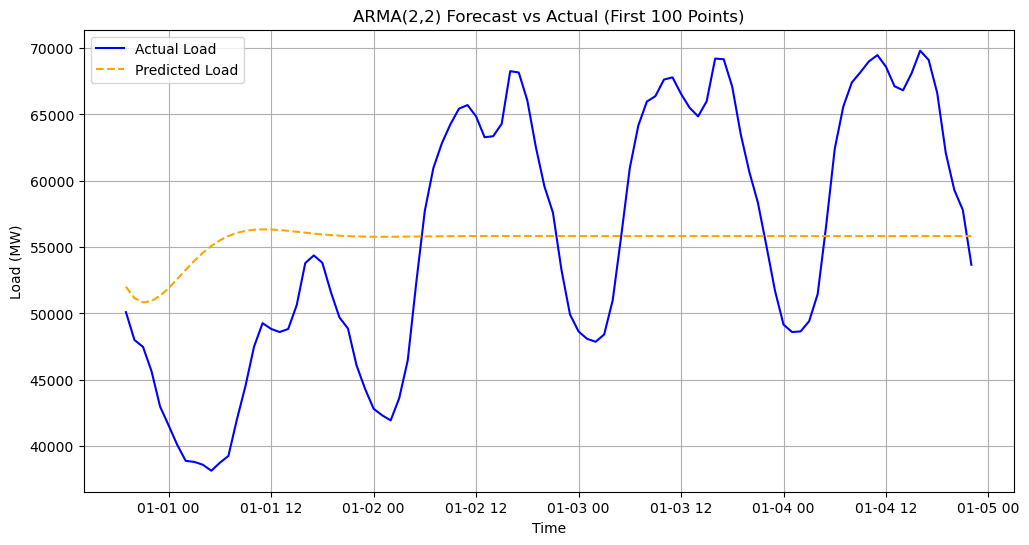

In [5]:
# ARMA(2,2) model based on ACF/PACF
print("Training ARMA(2,2) model...")
arma_model = ARIMA(train, order=(2, 0, 2))
arma_fit = arma_model.fit()

# Forecast
print("Generating Forecasts...")
forecast = arma_fit.forecast(steps=len(test))
forecast_series = pd.Series(forecast, index=test.index)

# Evaluation
mape_score = mape(test, forecast_series)
mae_score = mean_absolute_error(test, forecast_series)
rmse_score = np.sqrt(mean_squared_error(test, forecast_series))
r2 = r2_score(test, forecast_series)

print("\nARMA(2,2) Evaluation Metrics:")
print(f"MAPE: {mape_score:.4f}")
print(f"MAE: {mae_score:.4f}")
print(f"RMSE: {rmse_score:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Predictions vs Actual for First 100 Points
plt.figure(figsize=(12, 6))
plt.plot(test[:100], label="Actual Load", color="blue")
plt.plot(forecast_series[:100], label="Predicted Load", color="orange", linestyle="dashed")
plt.title("ARMA(2,2) Forecast vs Actual (First 100 Points)")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.grid(True)
plt.show()

## AIC

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


New best ARMA(1,1) with AIC: 623414.90


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(1,2) with AIC: 613845.32


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(1,3) with AIC: 610895.30


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(1,4) with AIC: 610326.60


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(1,5) with AIC: 609306.07


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(2,1) with AIC: 608508.63


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(2,2) with AIC: 608507.12


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(2,3) with AIC: 608390.56


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(2,4) with AIC: 608321.08


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(2,5) with AIC: 607636.42


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

New best ARMA(3,4) with AIC: 606255.74


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


New best ARMA(3,5) with AIC: 605658.30


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

New best ARMA(5,4) with AIC: 605591.54


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par


Best ARMA Order: (5,4)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Final Test MAPE: 0.1611
Final Test MAE: 8612.3515
Final Test RMSE: 9887.0841
Final Test R² Score: 0.0010


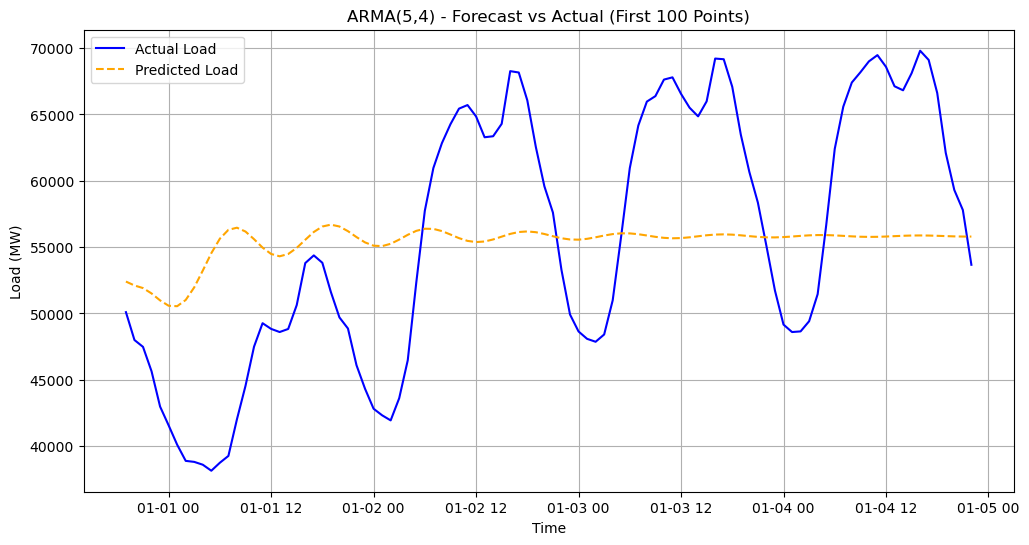

In [6]:
# Find best ARMA(p, q) based on AIC
def find_best_arma(train, max_p=5, max_q=5):
    best_aic = float('inf')
    best_order = None

    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                model = ARIMA(train, order=(p, 0, q))
                result = model.fit()
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
                    print(f"New best ARMA({p},{q}) with AIC: {best_aic:.2f}")
            except:
                continue
    return best_order

# Select and train model
best_p, best_q = find_best_arma(train)
print(f"\nBest ARMA Order: ({best_p},{best_q})")

arma_best = ARIMA(train, order=(best_p, 0, best_q)).fit()
forecast = arma_best.forecast(steps=len(test))
forecast_series = pd.Series(forecast, index=test.index)

# Evaluate
test_mape = mape(test, forecast_series)
test_mae = mean_absolute_error(test, forecast_series)
test_rmse = np.sqrt(mean_squared_error(test, forecast_series))
test_r2 = r2_score(test, forecast_series)

print(f"\nFinal Test MAPE: {test_mape:.4f}")
print(f"Final Test MAE: {test_mae:.4f}")
print(f"Final Test RMSE: {test_rmse:.4f}")
print(f"Final Test R² Score: {test_r2:.4f}")

# Plot first 100 points
plt.figure(figsize=(12, 6))
plt.plot(test[:100], label="Actual Load", color="blue")
plt.plot(forecast_series[:100], label="Predicted Load", color="orange", linestyle="dashed")
plt.title(f"ARMA({best_p},{best_q}) - Forecast vs Actual (First 100 Points)")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.grid(True)
plt.show()


ARMA(5,4) - June 3-7, 2019 Metrics:
MAPE: 0.1414
MAE: 8091.3066 MW
RMSE: 8893.7943 MW
R²: -0.0924


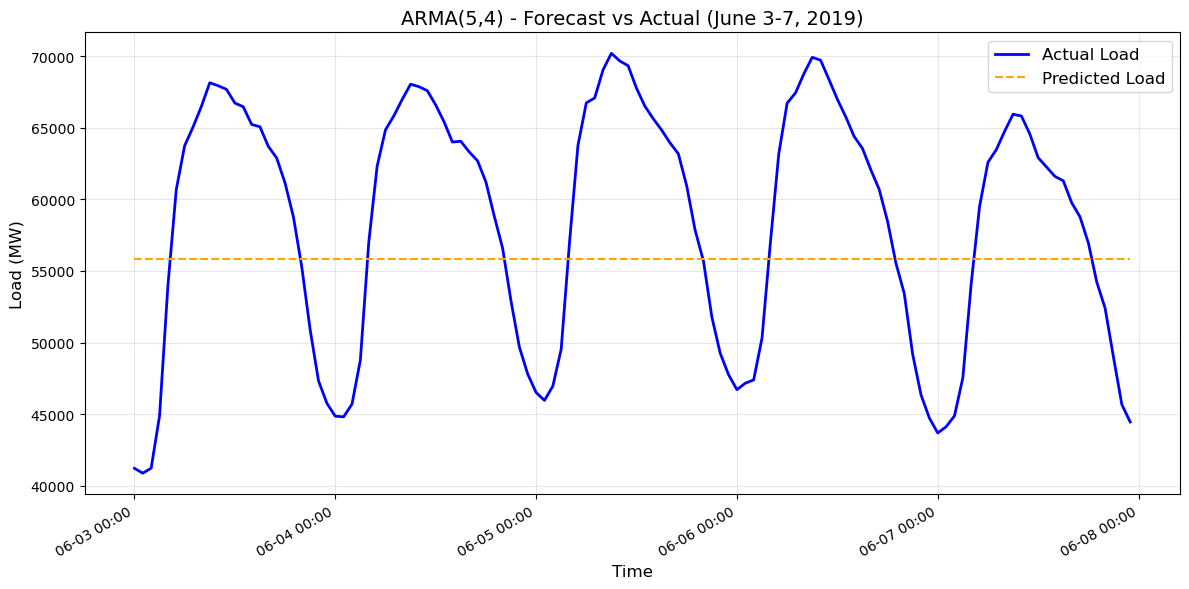

In [8]:
# Standardized visualization for June 3-7, 2019
start_date = '2019-06-03'
end_date = '2019-06-07 23:59:59'

# Filter the test and forecast data to this date range
mask = (test.index >= start_date) & (test.index <= end_date)
test_period = test[mask]
forecast_period = forecast_series[mask]

# Create the standardized visualization
plt.figure(figsize=(12, 6))
plt.plot(test_period.index, test_period, label="Actual Load", color="blue", linewidth=2)
plt.plot(forecast_period.index, forecast_period, label="Predicted Load", color="orange", linestyle="dashed")

# Set title and labels with consistent formatting
plt.title(f"ARMA({best_p},{best_q}) - Forecast vs Actual (June 3-7, 2019)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Load (MW)", fontsize=12)

# Format x-axis for better date display
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.gcf().autofmt_xdate()

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Calculate metrics specifically for this period
period_mape = mape(test_period, forecast_period)
period_mae = mean_absolute_error(test_period, forecast_period)
period_rmse = np.sqrt(mean_squared_error(test_period, forecast_period))
period_r2 = r2_score(test_period, forecast_period)

print(f"\nARMA({best_p},{best_q}) - June 3-7, 2019 Metrics:")
print(f"MAPE: {period_mape:.4f}")
print(f"MAE: {period_mae:.4f} MW")
print(f"RMSE: {period_rmse:.4f} MW")
print(f"R²: {period_r2:.4f}")

Number of data points on June 5th: 24

Hourly Results for ARMA(5,4) - June 5, 2019:
 Hour  Actual Load (MW)  Predicted Load (MW)  Absolute Error (MW)  Percentage Error (%)
    0           46510.0             55827.86              9317.86                 20.03
    1           45963.0             55827.86              9864.86                 21.46
    2           46954.0             55827.86              8873.86                 18.90
    3           49548.0             55827.86              6279.86                 12.67
    4           57040.0             55827.86              1212.14                  2.13
    5           63757.0             55827.86              7929.14                 12.44
    6           66735.0             55827.86             10907.14                 16.34
    7           67076.0             55827.86             11248.14                 16.77
    8           69040.0             55827.86             13212.14                 19.14
    9           70194.0             

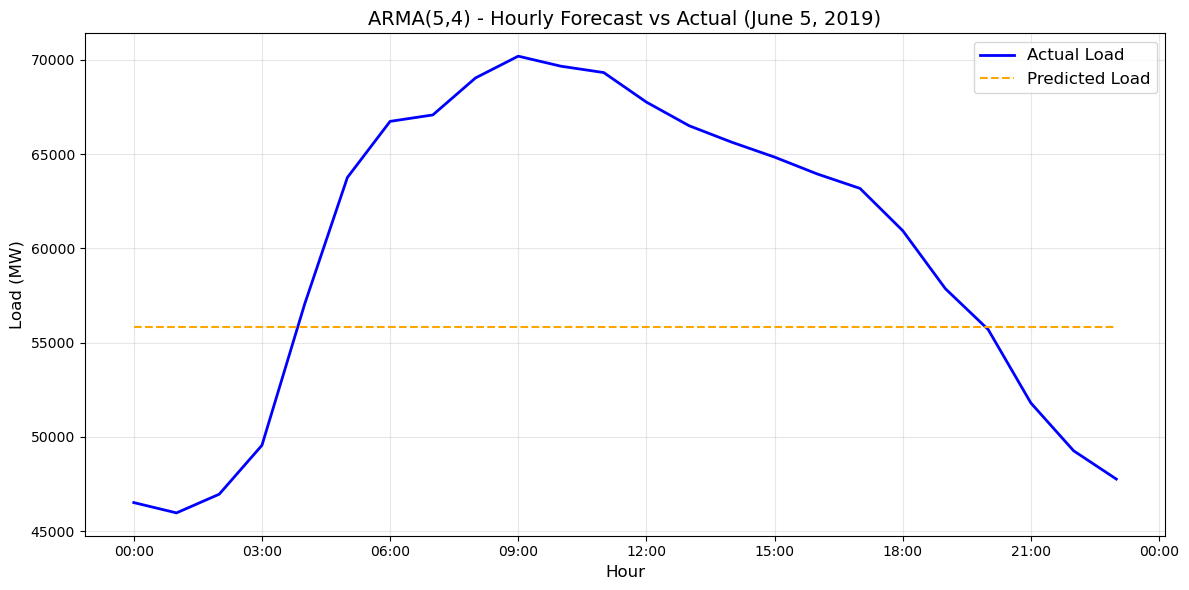

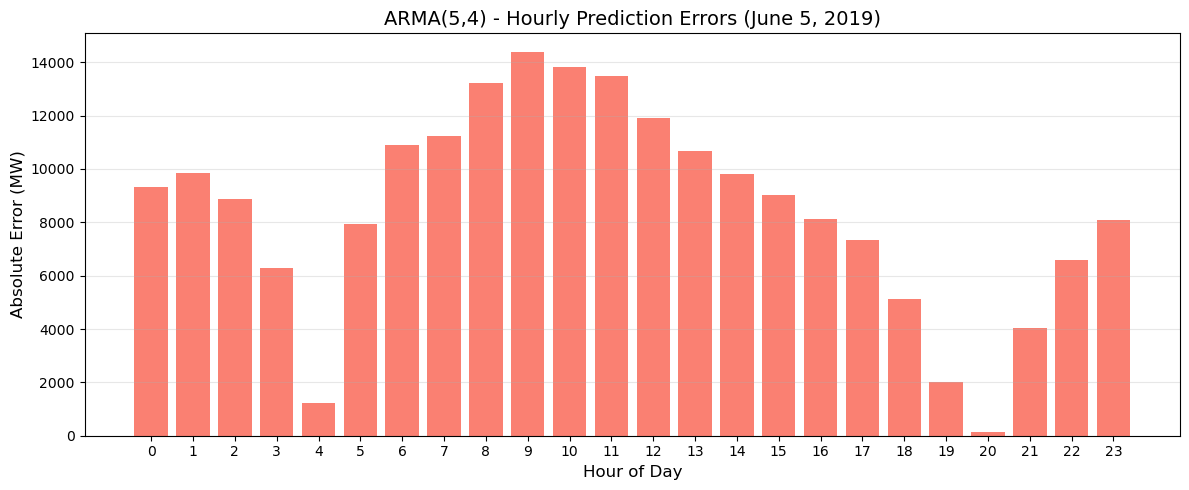

In [9]:
# Detailed hourly analysis for ARMA - June 5th, 2019
specific_date = '2019-06-05'

# Create DataFrame with predictions and actual values for easier analysis
test_results = pd.DataFrame({
    'actual': test,
    'predicted': forecast_series
})

# Filter to just June 5th data
june_5th_data = test_results.loc[specific_date]
print(f"Number of data points on June 5th: {len(june_5th_data)}")

# Create a DataFrame with hourly results
hourly_results = pd.DataFrame({
    'Hour': june_5th_data.index.hour,
    'Actual Load (MW)': june_5th_data['actual'].values,
    'Predicted Load (MW)': june_5th_data['predicted'].values
})

# Calculate hourly errors
hourly_results['Absolute Error (MW)'] = abs(hourly_results['Actual Load (MW)'] - hourly_results['Predicted Load (MW)'])
hourly_results['Percentage Error (%)'] = (hourly_results['Absolute Error (MW)'] / hourly_results['Actual Load (MW)']) * 100

# Format to 2 decimal places for better readability
hourly_results['Actual Load (MW)'] = hourly_results['Actual Load (MW)'].round(2)
hourly_results['Predicted Load (MW)'] = hourly_results['Predicted Load (MW)'].round(2)
hourly_results['Absolute Error (MW)'] = hourly_results['Absolute Error (MW)'].round(2)
hourly_results['Percentage Error (%)'] = hourly_results['Percentage Error (%)'].round(2)

# Display the hourly results as a table
print(f"\nHourly Results for ARMA({best_p},{best_q}) - June 5, 2019:")
print(hourly_results.to_string(index=False))

# Calculate summary statistics
avg_error = hourly_results['Absolute Error (MW)'].mean()
max_error = hourly_results['Absolute Error (MW)'].max()
max_error_hour = hourly_results.loc[hourly_results['Absolute Error (MW)'].idxmax(), 'Hour']
min_error = hourly_results['Absolute Error (MW)'].min()
min_error_hour = hourly_results.loc[hourly_results['Absolute Error (MW)'].idxmin(), 'Hour']

print(f"\nSummary Statistics for June 5, 2019:")
print(f"Average Absolute Error: {avg_error:.2f} MW")
print(f"Maximum Error: {max_error:.2f} MW (Hour {max_error_hour})")
print(f"Minimum Error: {min_error:.2f} MW (Hour {min_error_hour})")

# Create visualization of hourly actual vs. predicted load
plt.figure(figsize=(12, 6))
plt.plot(june_5th_data.index, june_5th_data['actual'], label="Actual Load", color="blue", linewidth=2)
plt.plot(june_5th_data.index, june_5th_data['predicted'], label="Predicted Load", color="orange", linestyle="dashed")

plt.title(f"ARMA({best_p},{best_q}) - Hourly Forecast vs Actual (June 5, 2019)", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Load (MW)", fontsize=12)

# Format x-axis to show hours
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=0)

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize hourly errors
plt.figure(figsize=(12, 5))
plt.bar(hourly_results['Hour'], hourly_results['Absolute Error (MW)'], color='salmon')
plt.title(f"ARMA({best_p},{best_q}) - Hourly Prediction Errors (June 5, 2019)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Absolute Error (MW)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()